In [ ]:
import pandas as pd
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from keras.layers import Flatten, Dense
from keras.applications import VGG16
from keras.preprocessing.image import img_to_array, ImageDataGenerator

In [ ]:
!unzip "/content/drive/MyDrive/classroom/Datasets/images.zip" -d "/content/drive/MyDrive/classroom/Datasets"

Archive:  /content/drive/MyDrive/classroom/Datasets/images.zip
  inflating: /content/drive/MyDrive/classroom/Datasets/images/0.jpg  
  inflating: /content/drive/MyDrive/classroom/Datasets/images/1.jpg  
  inflating: /content/drive/MyDrive/classroom/Datasets/images/10.jpg  
  inflating: /content/drive/MyDrive/classroom/Datasets/images/100.jpg  
  inflating: /content/drive/MyDrive/classroom/Datasets/images/1000.jpg  
  inflating: /content/drive/MyDrive/classroom/Datasets/images/1001.jpg  
  inflating: /content/drive/MyDrive/classroom/Datasets/images/1002.jpg  
  inflating: /content/drive/MyDrive/classroom/Datasets/images/1003.jpg  
  inflating: /content/drive/MyDrive/classroom/Datasets/images/1004.jpg  
  inflating: /content/drive/MyDrive/classroom/Datasets/images/1005.jpg  
  inflating: /content/drive/MyDrive/classroom/Datasets/images/1006.jpg  
  inflating: /content/drive/MyDrive/classroom/Datasets/images/1007.jpg  
  inflating: /content/drive/MyDrive/classroom/Datasets/images/1008.jpg

In [ ]:
traindf = pd.read_csv("/content/drive/MyDrive/classroom/Datasets/emergency_train.csv", dtype=str)
traindf.head(10)

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
5,45.jpg,1
6,2313.jpg,0
7,1657.jpg,0
8,294.jpg,1
9,999.jpg,0


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255., validation_split=0.10)

In [ ]:
valid_datagen = ImageDataGenerator(rescale = 1./255., validation_split=0.15)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe = traindf,
    directory = "/content/drive/MyDrive/classroom/Datasets/images",
    x_col = 'image_names',
    y_col = 'emergency_or_not',
    subset = 'training',
    batch_size = 16,
    seed = 42,
    shuffle = True,
    class_mode = "binary",
    target_size = (224,224))

Found 1646 validated image filenames belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe = traindf,
    directory = "/content/drive/MyDrive/classroom/Datasets/images",
    x_col = 'image_names',
    y_col = 'emergency_or_not',
    subset = 'validation',
    batch_size = 16,
    seed = 42,
    shuffle = True,
    class_mode = "binary",
    target_size = (224,224)
)

Found 164 validated image filenames belonging to 2 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_dataframe(
    dataframe = traindf,
    directory = "/content/drive/MyDrive/classroom/Datasets/images",
    x_col = 'image_names',
    y_col = 'emergency_or_not',
    subset = 'validation',
    batch_size = 16,
    seed = 42,
    shuffle = True,
    class_mode = "binary",
    target_size = (224,224)
)

Found 246 validated image filenames belonging to 2 classes.


In [ ]:
vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (224,224,3))

for layer in vgg.layers :
  layer.trainable=False

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
x = Flatten()(vgg.output)
x = Dense(1,activation='sigmoid')(x)

model = Model(inputs = vgg.input, outputs = x)
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
train_generator.class_indices

{'0': 0, '1': 1}

In [ ]:
history = model.fit_generator(train_generator, epochs = 5, validation_data=valid_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
103/103 [==============================] - 947s 9s/step - loss: 0.5500 - accuracy: 0.7456 - val_loss: 0.2140 - val_accuracy: 0.9106
Epoch 2/5
103/103 [==============================] - 943s 9s/step - loss: 0.2388 - accuracy: 0.9095 - val_loss: 0.1419 - val_accuracy: 0.9512
Epoch 3/5
103/103 [==============================] - 941s 9s/step - loss: 0.1875 - accuracy: 0.9280 - val_loss: 0.1016 - val_accuracy: 0.9593
Epoch 4/5
103/103 [==============================] - 941s 9s/step - loss: 0.1461 - accuracy: 0.9512 - val_loss: 0.1468 - val_accuracy: 0.9512
Epoch 5/5
103/103 [==============================] - 943s 9s/step - loss: 0.1071 - accuracy: 0.9621 - val_loss: 0.0819 - val_accuracy: 0.9675


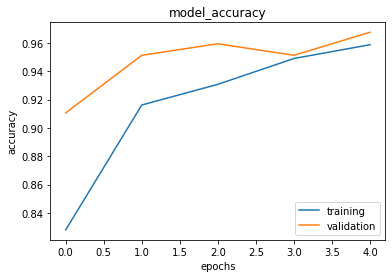

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='best')
plt.show()

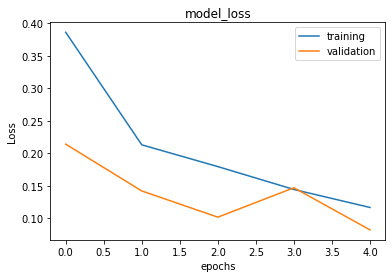

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='best')
plt.show()

In [ ]:
scores = model.evaluate_generator(test_generator, steps = 50)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


accuracy: 96.34%
